## 1. Introdução aos Dicionários


- O que são dicionários?
  - Estruturas de dados que armazenam pares de chave-valor.
  - Sintaxe básica: {chave: valor}
- Comparação com listas e tuplas:
  - Acesso aos valores através de chaves, não índices.

In [1]:
aluno = {
    "nome": "João",
    "idade": 20,
    "curso": "Engenharia",
}

## 2. Operações Básicas

- Acessar valores:

In [2]:
aluno["idade"]

20

- Adicionando e modificando valores:

In [3]:
aluno["idade"] = 21  # altera o valor da chave "idade"
aluno["nota"] = 9.5  # adiciona uma nova chave "nota"

In [4]:
aluno

{'nome': 'João', 'idade': 21, 'curso': 'Engenharia', 'nota': 9.5}

- Removendo valores:

In [5]:
# del é um comando do Python que remove elementos da memória.
# No caso de dicionários, ele remove a chave e o valor associado a ela.
del aluno["nota"]

In [6]:
aluno

{'nome': 'João', 'idade': 21, 'curso': 'Engenharia'}

- Métodos comuns em dicionários:

In [7]:
aluno.keys()  # retorna as chaves do dicionário

dict_keys(['nome', 'idade', 'curso'])

In [8]:
type(
    aluno.keys()
)  # dict_keys é uma estrutura para armazenar chaves de dicionários, não sendo necessariamente uma lista

dict_keys

In [9]:
aluno.values()  # retorna os valores do dicionário

dict_values(['João', 21, 'Engenharia'])

In [10]:
aluno.items()  # retorna os pares chave-valor do dicionário

dict_items([('nome', 'João'), ('idade', 21), ('curso', 'Engenharia')])

## 3. Iterando sobre Dicionários

- Iterando sobre chaves:

In [11]:
for key in aluno.keys():
    print(key)

nome
idade
curso


In [12]:
for i, key in enumerate(aluno.keys()):
    print(f"Chave {i}: {key}")

Chave 0: nome
Chave 1: idade
Chave 2: curso


- Iterando sobre valores:

In [13]:
for value in aluno.values():
    print(value)

João
21
Engenharia


- Iterando sobre chaves e valores:

In [14]:
for key, value in zip(aluno.keys(), aluno.values()):
    print(f"{key}: {value}")

nome: João
idade: 21
curso: Engenharia


In [15]:
for key, value in aluno.items():
    print(f"{key}: {value}")

nome: João
idade: 21
curso: Engenharia


## 4. Métodos avançados de Dicionários

- Método get():

In [16]:
# Similar a aluno["nome"]
aluno.get("nome")  # retorna o valor associado à chave "nome"

'João'

In [17]:
# aluno["endereço"]  # KeyError: 'endereço'


# retorna o valor associado à chave "endereço" ou "Não informado" se a chave não existir
aluno.get("endereço", "Endereço não informado")

'Endereço não informado'

- Método setdefault():

In [18]:
aluno.setdefault(
    "endereço", "Rua X, 123"
)  # adiciona a chave "endereço" com o valor "Rua X, 123"

'Rua X, 123'

In [19]:
aluno

{'nome': 'João', 'idade': 21, 'curso': 'Engenharia', 'endereço': 'Rua X, 123'}

In [20]:
aluno.setdefault("nome", "Não Informado")  # não altera o valor da chave "nome"

'João'

In [21]:
aluno

{'nome': 'João', 'idade': 21, 'curso': 'Engenharia', 'endereço': 'Rua X, 123'}

- Método update():

É necessário se atentar ao fato de que o método `.update()` pode modificar os dados já existentes no dicionário.

In [22]:
dados_adicionais = {"endereço": "Rua Y, 456", "telefone": "1234-5678"}

# adiciona as chaves e valores do dicionário dados_adicionais ao dicionário aluno
aluno.update(dados_adicionais)

In [23]:
aluno

{'nome': 'João',
 'idade': 21,
 'curso': 'Engenharia',
 'endereço': 'Rua Y, 456',
 'telefone': '1234-5678'}

- Compreensão de dicionários:

In [24]:
quadrados = {x: x**2 for x in range(10)}
quadrados

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

In [25]:
lista_de_quadrados = [(x, x**2) for x in range(10)]
lista_de_quadrados

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

In [26]:
# acessar o elemento que contém o quadrado do número 5
i = 5
for x, x2 in lista_de_quadrados:
    if x == i:
        print((x, x2))
        break

(5, 25)


In [27]:
# em comparação, em dicionários o acesso é direto
(i, quadrados[i])

(5, 25)

## 5. Aplicação em processamento de texto (NLP)

Vamos criar um dicionário para armazenar a **contagem** de palavras em um texto.


In [28]:
def limpa_texto(texto: str) -> str:
    # versão alternativa para limpar caracteres especiais
    # texto = "".join(
    #     letra if letra.isalnum() or letra in (" ", "-") for letra in texto
    # )

    # Limpar caracteres especiais, permitindo apenas letras, números, espaços e hífens
    novo_texto = ""
    for letra in texto:
        if letra.isalnum() or letra in (" ", "-"):
            novo_texto += letra
    return novo_texto


def conta_palavras(texto: str) -> dict[str, int]:
    # transformar o texto para minúsculas
    texto = texto.lower()

    # Limpar caracteres especiais, permitindo apenas letras, números, espaços e hífens
    texto = limpa_texto(texto)

    # divide o texto em palavras,
    # utilizando o critério de espaços em branco
    # em que uma palavra é uma sequência de caracteres sem espaços
    palavras = texto.split()

    contagem = {}
    for palavra in palavras:
        # não é possível acessar a chave palavra diretamente,
        # pois ela pode não existir
        # contagem[palavra] += 1
        contagem[palavra] = contagem.get(palavra, 0) + 1
    return contagem

In [29]:
texto = """
Python é uma linguagem de programação de alto nível, interpretada, de script, imperativa, orientada a objetos, funcional, de tipagem dinâmica e forte. Foi lançada por Guido van Rossum em 1991. Python é conhecida por sua sintaxe clara e legível, o que a torna uma excelente escolha para iniciantes e profissionais. A linguagem suporta múltiplos paradigmas de programação, incluindo programação procedural, orientada a objetos e funcional. Além disso, Python possui uma vasta biblioteca padrão e uma comunidade ativa que contribui com uma infinidade de pacotes e módulos, facilitando o desenvolvimento de aplicações complexas.

Python é amplamente utilizada em diversas áreas, como desenvolvimento web, ciência de dados, inteligência artificial, automação de tarefas, entre outras. Sua popularidade cresceu significativamente nos últimos anos devido à sua versatilidade e facilidade de uso. A linguagem é compatível com diferentes sistemas operacionais, como Windows, macOS e Linux, e pode ser integrada com outras linguagens de programação.

A filosofia do Python enfatiza a legibilidade do código e a simplicidade, seguindo o princípio de que "há apenas uma maneira óbvia de fazer algo". Isso ajuda os desenvolvedores a escreverem código mais limpo e eficiente. Com uma curva de aprendizado suave e uma comunidade acolhedora, Python continua a ser uma das linguagens de programação mais populares e influentes do mundo.
"""
conta_palavras(texto)

{'python': 5,
 'é': 4,
 'uma': 9,
 'linguagem': 3,
 'de': 15,
 'programação': 4,
 'alto': 1,
 'nível': 1,
 'interpretada': 1,
 'script': 1,
 'imperativa': 1,
 'orientada': 2,
 'a': 9,
 'objetos': 2,
 'funcional': 2,
 'tipagem': 1,
 'dinâmica': 1,
 'e': 13,
 'forte': 1,
 'foi': 1,
 'lançada': 1,
 'por': 2,
 'guido': 1,
 'van': 1,
 'rossum': 1,
 'em': 2,
 '1991': 1,
 'conhecida': 1,
 'sua': 3,
 'sintaxe': 1,
 'clara': 1,
 'legível': 1,
 'o': 3,
 'que': 3,
 'torna': 1,
 'excelente': 1,
 'escolha': 1,
 'para': 1,
 'iniciantes': 1,
 'profissionais': 1,
 'suporta': 1,
 'múltiplos': 1,
 'paradigmas': 1,
 'incluindo': 1,
 'procedural': 1,
 'além': 1,
 'disso': 1,
 'possui': 1,
 'vasta': 1,
 'biblioteca': 1,
 'padrão': 1,
 'comunidade': 2,
 'ativa': 1,
 'contribui': 1,
 'com': 4,
 'infinidade': 1,
 'pacotes': 1,
 'módulos': 1,
 'facilitando': 1,
 'desenvolvimento': 2,
 'aplicações': 1,
 'complexaspython': 1,
 'amplamente': 1,
 'utilizada': 1,
 'diversas': 1,
 'áreas': 1,
 'como': 2,
 'web': 1,


## 6. Utilizando `defaultdict` e `Counter` do módulo `collections` 

- defaultdict: é um dicionário que atribui um valor padrão a chaves que não existem.

In [30]:
from collections import defaultdict

dd = defaultdict(int)

In [31]:
dd["a"]

0

In [32]:
def conta_palavras_com_defaultdict(texto: str) -> dict[str, int]:
    # transformar o texto para minúsculas
    texto = texto.lower()

    # Limpar caracteres especiais, permitindo apenas letras, números, espaços e hífens
    texto = limpa_texto(texto)

    # divide o texto em palavras,
    # utilizando o critério de espaços em branco
    # em que uma palavra é uma sequência de caracteres sem espaços
    palavras = texto.split()

    contagem = defaultdict(int)
    for palavra in palavras:
        # como utilizamos o defaultdict,
        # não é necessário verificar se a chave existe,
        # nem utilizar o método get
        contagem[palavra] += 1
    return contagem

In [33]:
texto = """ Python é uma linguagem de programação de alto nível, interpretada, de script, imperativa, orientada a objetos, funcional, de tipagem dinâmica e forte. Foi lançada por Guido van Rossum em 1991. Python é conhecida por sua sintaxe clara e legível, o que a torna uma excelente escolha para iniciantes e profissionais. A linguagem suporta múltiplos paradigmas de programação, incluindo programação procedural, orientada a objetos e funcional. Além disso, Python possui uma vasta biblioteca padrão e uma comunidade ativa que contribui com uma infinidade de pacotes e módulos, facilitando o desenvolvimento de aplicações complexas. Python é amplamente utilizada em diversas áreas, como desenvolvimento web, ciência de dados, inteligência artificial, automação de tarefas, entre outras. Sua popularidade cresceu significativamente nos últimos anos devido à sua versatilidade e facilidade de uso. A linguagem é compatível com diferentes sistemas operacionais, como Windows, macOS e Linux, e pode ser integrada com outras linguagens de programação. A filosofia do Python enfatiza a legibilidade do código e a simplicidade, seguindo o princípio de que "há apenas uma maneira óbvia de fazer algo". Isso ajuda os desenvolvedores a escreverem código mais limpo e eficiente. Com uma curva de aprendizado suave e uma comunidade acolhedora, Python continua a ser uma das linguagens de programação mais populares e influentes do mundo. """
conta_palavras_com_defaultdict(texto)

defaultdict(int,
            {'python': 6,
             'é': 4,
             'uma': 9,
             'linguagem': 3,
             'de': 15,
             'programação': 5,
             'alto': 1,
             'nível': 1,
             'interpretada': 1,
             'script': 1,
             'imperativa': 1,
             'orientada': 2,
             'a': 10,
             'objetos': 2,
             'funcional': 2,
             'tipagem': 1,
             'dinâmica': 1,
             'e': 13,
             'forte': 1,
             'foi': 1,
             'lançada': 1,
             'por': 2,
             'guido': 1,
             'van': 1,
             'rossum': 1,
             'em': 2,
             '1991': 1,
             'conhecida': 1,
             'sua': 3,
             'sintaxe': 1,
             'clara': 1,
             'legível': 1,
             'o': 3,
             'que': 3,
             'torna': 1,
             'excelente': 1,
             'escolha': 1,
             'para': 1,
           

- Counter: é uma `subclasse` de dicionário que facilita a contagem de objetos.

In [34]:
from collections import Counter

ctn = Counter(["a", "b", "a", "c", "b", "a"])
ctn

Counter({'a': 3, 'b': 2, 'c': 1})

In [35]:
def conta_palavras_com_counter(texto: str) -> Counter:
    # transformar o texto para minúsculas
    texto = texto.lower()

    # Limpar caracteres especiais, permitindo apenas letras, números, espaços e hífens
    texto = limpa_texto(texto)

    # divide o texto em palavras,
    # utilizando o critério de espaços em branco
    # em que uma palavra é uma sequência de caracteres sem espaços
    palavras = texto.split()

    # não é mais necessário criar um for loop,
    # pois o Counter faz isso automaticamente
    return Counter(palavras)

In [36]:
conta_palavras_com_counter(texto)

Counter({'de': 15,
         'e': 13,
         'a': 10,
         'uma': 9,
         'python': 6,
         'programação': 5,
         'é': 4,
         'com': 4,
         'linguagem': 3,
         'sua': 3,
         'o': 3,
         'que': 3,
         'do': 3,
         'orientada': 2,
         'objetos': 2,
         'funcional': 2,
         'por': 2,
         'em': 2,
         'comunidade': 2,
         'desenvolvimento': 2,
         'como': 2,
         'outras': 2,
         'ser': 2,
         'linguagens': 2,
         'código': 2,
         'mais': 2,
         'alto': 1,
         'nível': 1,
         'interpretada': 1,
         'script': 1,
         'imperativa': 1,
         'tipagem': 1,
         'dinâmica': 1,
         'forte': 1,
         'foi': 1,
         'lançada': 1,
         'guido': 1,
         'van': 1,
         'rossum': 1,
         '1991': 1,
         'conhecida': 1,
         'sintaxe': 1,
         'clara': 1,
         'legível': 1,
         'torna': 1,
         'excelente': 1,


## 7. Exercícios 

1. Crie uma lista de dicionários para armazenar informações de um contato (nome, telefone e e-mail) e adicione 3 contatos.

In [37]:
# criando contato por contato e inserindo na lista de contatos via append
contatos: list[dict] = []

contato: dict[str, str] = {
    "nome": "João",
    "telefone": "1234-5678",
    "email": "joao@gmail.com",
}

contatos.append(contato)

contato = {
    "nome": "Maria",
    "telefone": "9876-5432",
    "email": "maria@gmail.com",
}

contatos.append(contato)

contato = {
    "nome": "José",
    "telefone": "4567-8901",
    "email": "jose@gmail.com",
}
contatos.append(contato)

In [38]:
# criando todos os contatos de uma vez dentro da lista de contatos
contatos = [
    {
        "nome": "João",
        "telefone": "1234-5678",
        "email": "joao@gmail.com",
    },
    {
        "nome": "Maria",
        "telefone": "9876-5432",
        "email": "maria@gmail.com",
    },
    {
        "nome": "José",
        "telefone": "4567-8901",
        "email": "jose@gmail.com",
    },
]

In [39]:
# acessando todos os contatos
contatos

[{'nome': 'João', 'telefone': '1234-5678', 'email': 'joao@gmail.com'},
 {'nome': 'Maria', 'telefone': '9876-5432', 'email': 'maria@gmail.com'},
 {'nome': 'José', 'telefone': '4567-8901', 'email': 'jose@gmail.com'}]

In [40]:
# acessando o primeiro contato
contatos[0]

{'nome': 'João', 'telefone': '1234-5678', 'email': 'joao@gmail.com'}

In [41]:
# acessando o último contato
contatos[-1]

{'nome': 'José', 'telefone': '4567-8901', 'email': 'jose@gmail.com'}

In [42]:
# acessando os dois primeiros contatos
contatos[:2]

[{'nome': 'João', 'telefone': '1234-5678', 'email': 'joao@gmail.com'},
 {'nome': 'Maria', 'telefone': '9876-5432', 'email': 'maria@gmail.com'}]

In [43]:
# acessando o nome do primeiro contato
contatos[0]["nome"]

'João'

2. Crie um dicionário para armazenar a frequência de caracteres numéricos em uma frase.

In [44]:
texto = """
Python é uma linguagem de programação de alto nível, interpretada, de script, imperativa, orientada a objetos, funcional, de tipagem dinâmica e forte. Foi lançada por Guido van Rossum em 1991. Python é conhecida por sua sintaxe clara e legível, o que a torna uma excelente escolha para iniciantes e profissionais. A linguagem suporta múltiplos paradigmas de programação, incluindo programação procedural, orientada a objetos e funcional. Além disso, Python possui uma vasta biblioteca padrão e uma comunidade ativa que contribui com uma infinidade de pacotes e módulos, facilitando o desenvolvimento de aplicações complexas.
"""

n = len(texto)  # número de caracteres no texto


def limpa_texto(texto: str) -> str:
    return "".join(letra if letra.isalnum() else "" for letra in texto)


def conta_caracteres(texto: str) -> dict[str, int]:
    texto_limpo = limpa_texto(texto.lower())
    count = defaultdict(int)
    total_valid_chars = 0
    for letra in texto_limpo:
        count[letra] += 1
        total_valid_chars += 1
    count["especiais"] = n - total_valid_chars
    return count


def count_dict_to_freq_dict(count: dict[str, int], n: int) -> dict[str, float]:
    # for key, value in count.items():
    #     count[key] = round(100 * value / n, 2)
    # return count
    return {key: round(100 * value / n, 2) for key, value in count.items()}


contagem_de_caracteres = conta_caracteres(texto)
frequencia_de_caracteres = count_dict_to_freq_dict(contagem_de_caracteres, n)

In [45]:
frequencia_de_caracteres

{'p': 3.67,
 'y': 0.48,
 't': 4.31,
 'h': 0.8,
 'o': 7.67,
 'n': 5.11,
 'é': 0.48,
 'u': 3.35,
 'm': 3.67,
 'a': 10.38,
 'l': 3.67,
 'i': 6.71,
 'g': 1.76,
 'e': 7.67,
 'd': 4.15,
 'r': 4.15,
 'ç': 0.8,
 'ã': 0.64,
 'í': 0.32,
 'v': 1.28,
 's': 3.99,
 'c': 3.19,
 'b': 0.8,
 'j': 0.32,
 'f': 1.12,
 'â': 0.16,
 '1': 0.32,
 '9': 0.32,
 'x': 0.48,
 'q': 0.32,
 'ú': 0.16,
 'ó': 0.16,
 'õ': 0.16,
 'especiais': 17.41}

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns

sns.set_style()

s = pd.Series(frequencia_de_caracteres).sort_values(ascending=False)
s.head()

especiais    17.41
a            10.38
e             7.67
o             7.67
i             6.71
dtype: float64

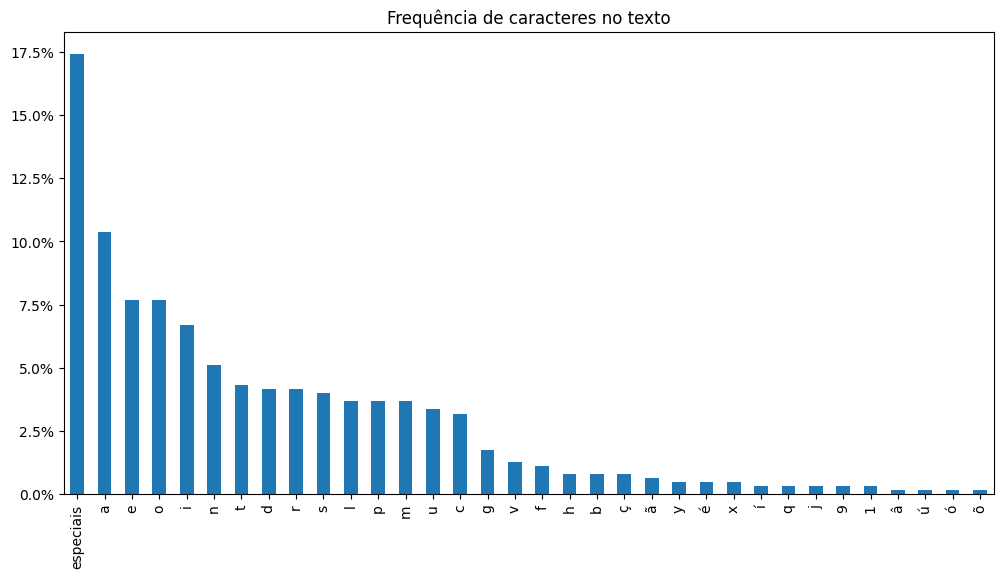

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
s.plot(kind="bar", ax=ax)
ax.set_title("Frequência de caracteres no texto")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())